In [1]:
DATA_PATH = "../data/processed/1_preprocessed_df.pkl"
DF_PATH = "../data/processed/2_preprocessed_df_roles_skills.pkl"
FEATURES_PATH = "../data/processed/features_skills_clusters.pkl"

ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageHaveWorkedWith',
                  'DatabaseHaveWorkedWith',
                  'PlatformHaveWorkedWith',
                  'WebframeHaveWorkedWith',
                  'MiscTechHaveWorkedWith',
                  'ToolsTechHaveWorkedWith',
                  'NEWCollabToolsHaveWorkedWith']

EXPORT_PATH = "../data/processed/3_cleaned_data.pkl"

In [2]:
# Load packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

---
## Read data

In [3]:
processed_df = pd.read_pickle(DATA_PATH)
ohe_df = pd.read_pickle(DF_PATH)
features_df = pd.read_pickle(FEATURES_PATH)

## Quick sanity check
**Here we check if our processed data looks like what we expect**

In [4]:
# Select random int
i = np.random.randint(processed_df.shape[0])

#Print original values
print(processed_df.iloc[i][ROLE_COLS].tolist())
print(processed_df.iloc[i][TECH_COLS].tolist())
print("_____________________")

#Print processed data
print(ohe_df.iloc[i][ohe_df.iloc[i]==1])
print("_____________________")

#Check clustering
print("Clusters:", features_df.iloc[i].sum())
print("Skills:", ohe_df[TECH_COLS].iloc[i].sum())

[[]]
[['Bash/Shell', 'C', 'C#', 'C++', 'HTML/CSS', 'Java', 'JavaScript', 'Kotlin', 'Node.js', 'PHP', 'PowerShell', 'Python', 'TypeScript'], ['MySQL'], [], ['Express', 'jQuery'], ['.NET Framework', '.NET Core / .NET 5'], ['Git', 'Unity 3D', 'Unreal Engine'], ['Android Studio', 'Atom', 'Eclipse', 'IntelliJ', 'Visual Studio', 'Visual Studio Code']]
_____________________
LanguageHaveWorkedWith        Bash/Shell            1
                              C                     1
                              C#                    1
                              C++                   1
                              HTML/CSS              1
                              Java                  1
                              JavaScript            1
                              Kotlin                1
                              Node.js               1
                              PHP                   1
                              PowerShell            1
                              Python

---
## Exclode some Roles
**Here we drop some rules which we see it irrelevant to what a user need; for example we don't want to predict a student role for our user. Another example; engineering manager isn't a role related to skills, it comes with experience not only technical skills**

In [5]:
print(ohe_df['DevType'].sum(axis=0))

Academic researcher                               2899
Data or business analyst                          3792
Data scientist or machine learning specialist     4273
Database administrator                            5655
Designer                                          4611
DevOps specialist                                 7058
Developer, QA or test                             3611
Developer, back-end                              29071
Developer, desktop or enterprise applications    11036
Developer, embedded applications or devices       4598
Developer, front-end                             18231
Developer, full-stack                            32891
Developer, game or graphics                       2112
Developer, mobile                                 9800
Educator                                          2369
Engineer, data                                    4176
Engineer, site reliability                        2448
Engineering manager                               3810
Marketing 

In [6]:
# Exclode roles
EXCLUDE_ROLES = [
    'Educator',
    'Engineering manager',
    'Other (please specify):',
    'Product manager',
    'Student',
    'Marketing or sales professional',
    'Engineer, site reliability',
    'Designer',
    'Senior Executive (C-Suite, VP, etc.)',
]

In [7]:
for role in EXCLUDE_ROLES:
    ohe_df = ohe_df.drop(("DevType", role), axis=1)

In [8]:
# Check the roles considered:
print(ohe_df['DevType'].sum(axis=0))

Academic researcher                               2899
Data or business analyst                          3792
Data scientist or machine learning specialist     4273
Database administrator                            5655
DevOps specialist                                 7058
Developer, QA or test                             3611
Developer, back-end                              29071
Developer, desktop or enterprise applications    11036
Developer, embedded applications or devices       4598
Developer, front-end                             18231
Developer, full-stack                            32891
Developer, game or graphics                       2112
Developer, mobile                                 9800
Engineer, data                                    4176
Scientist                                         2015
System administrator                              6079
dtype: int64


---
## Filter Data

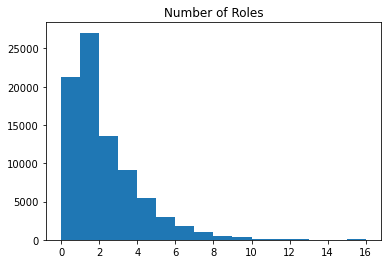

In [9]:
# Check for number of roles participants said they worked in
freq_roles = ohe_df[ROLE_COLS].sum(axis=1)
plt.hist(freq_roles, freq_roles.max())
plt.title("Number of Roles")
plt.show()

**From the plot above we can see that there are irrelevant answers where the participant says he worked for like 16 roles which is not possible. so we can choose a range for roles one can work with like say min=1 and max=3.**

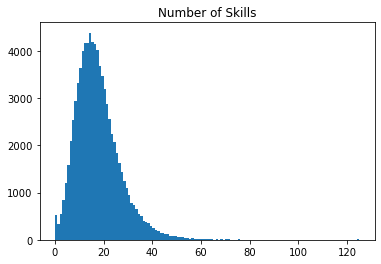

In [10]:
# Check for the number of skills participants said they have
freq_skills = ohe_df[TECH_COLS].sum(axis=1)
plt.hist(freq_skills, freq_skills.max())
plt.title("Number of Skills")
plt.show()

**Here we notice that there are irrelevant number of skills; we can see a participant says he has 120 skills. So we can take a range for the number of skills. Say; min=3 and max=40.**

In [11]:
# Filter frequencies
ROLES_RANGE = [1, 3]
TECH_RANGE = [3, 30]

In [12]:
# Create masks
role_mask = (freq_roles >= ROLES_RANGE[0]) & (freq_roles <= ROLES_RANGE[1])
tech_mask = (freq_skills >= TECH_RANGE[0]) & (freq_skills <= TECH_RANGE[1])
filter_mask = role_mask & tech_mask

In [13]:
features_df = features_df.loc[filter_mask].copy()
ohe_df = ohe_df.loc[filter_mask].copy()

In [14]:
#Check the total samples of roles
ohe_df["DevType"].sum(axis=0)

Academic researcher                               1708
Data or business analyst                          1658
Data scientist or machine learning specialist     2460
Database administrator                            1210
DevOps specialist                                 3056
Developer, QA or test                             1135
Developer, back-end                              17084
Developer, desktop or enterprise applications     4845
Developer, embedded applications or devices       2138
Developer, front-end                              8932
Developer, full-stack                            20655
Developer, game or graphics                        899
Developer, mobile                                 4751
Engineer, data                                    1941
Scientist                                         1046
System administrator                              2069
dtype: int64

---
## Merge and Export data
**Here we merge features and OneHotEncoded df into one total dataframe so we can read and split it latter as we wish**

In [15]:
# Add second level indexing 
features_df.columns = pd.MultiIndex.from_product([['skills_clusters'], features_df.columns])

In [16]:
# Concatinate
df = pd.concat([ohe_df, features_df], axis=1)

In [20]:
pd.options.display.max_columns=1000
df

DevType                           \
      Academic researcher Data or business analyst   
0                       0                        0   
3                       0                        0   
4                       0                        0   
8                       0                        0   
9                       0                        0   
...                   ...                      ...   
83434                   0                        0   
83435                   0                        0   
83436                   0                        0   
83437                   0                        0   
83438                   0                        0   

                                                                            \
      Data scientist or machine learning specialist Database administrator   
0                                                 0                      0   
3                                                 0                      0   
4                                                 0                      0   
8                                                 0                      0   
9                                                 1                      0   
...                                             ...                    ...   
83434                                             0                      0   
83435                                             0                      0   
83436                                             1                      0   
83437                                             0                      0   
83438                                             0                      0   

                                                                   \
      DevOps specialist Developer, QA or test Developer, back-end   
0                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   
8                     0                     0                   0   
9                     0                     0                   0   
...                 ...                   ...                 ...   
83434                 0                     0                   1   
83435                 0                     0                   0   
83436                 1                     0                   0   
83437                 0                     0                   1   
83438                 0                     0                   1   

                                                     \
      Developer, desktop or enterprise applications   
0                                                 0   
3                                                 0   
4                                                 1   
8                                                 0   
9                                                 0   
...                                             ...   
83434                                             0   
83435                                             0   
83436                                             0   
83437                                             0   
83438                                             0   

                                                                        \
      Developer, embedded applications or devices Developer, front-end   
0                                               0                    0   
3                                               0                    1   
4                                               0                    0   
8                                               0                    1   
9                                               0                    0   
...                                           ...                  ...   
83434                                           0                    0   
83435               

In [25]:
# Export
df.to_pickle(EXPORT_PATH)